In [2]:
from pyspark.sql import SparkSession
import os
from search import Search
from plotting import Plotting

os.environ["PYTHONUNBUFFERED"] = "1"
# os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3"
# os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"

In [3]:
def read(spark):
    datasets = {}
    for dataset in os.listdir("./ml-latest-small"):
        data = spark.read.option("header", True).format("csv").load(os.path.join(os.getcwd(),"ml-latest-small",dataset))
        datasets[dataset.split('.')[0]]=data
    return datasets

In [4]:
spark = SparkSession.builder.master("local").appName("Movies").config("conf-key", "conf-value").getOrCreate()
datasets = read(spark)

In [5]:
plotting = Plotting(datasets, spark)
search = Search(datasets, spark)

Search user by id, show the number of movies/genre that he/she has watched

In [5]:
search.search_user_movies('1')

DataFrame[userId: string, movieId: string, rating: float, timestamp: string, movieId: string, title: string, genres: string]

In [6]:
search.search_user_genre('1').show()

+---------+------------------+-------+
|   genres|       avg(rating)|watches|
+---------+------------------+-------+
|    Crime| 4.355555555555555|     45|
|  Romance|4.3076923076923075|     26|
| Thriller|4.1454545454545455|     55|
|Adventure|4.3882352941176475|     85|
|    Drama| 4.529411764705882|     68|
|      War|               4.5|     22|
|  Fantasy| 4.297872340425532|     47|
|  Mystery| 4.166666666666667|     18|
|  Musical| 4.681818181818182|     22|
|Animation| 4.689655172413793|     29|
|Film-Noir|               5.0|      1|
|   Horror|3.4705882352941178|     17|
|  Western| 4.285714285714286|      7|
|   Comedy|  4.27710843373494|     83|
| Children|4.5476190476190474|     42|
|   Action| 4.322222222222222|     90|
|   Sci-Fi|             4.225|     40|
+---------+------------------+-------+



Given a list of users, search all movies watched by each user

In [7]:
[i.show() for i in search.search_users_movies(["1","2","3"])]

+------+-------+------+---------+-------+--------------------+--------------------+
|userId|movieId|rating|timestamp|movieId|               title|              genres|
+------+-------+------+---------+-------+--------------------+--------------------+
|     1|      1|   4.0|964982703|      1|    Toy Story (1995)|Adventure|Animati...|
|     1|      3|   4.0|964981247|      3|Grumpier Old Men ...|      Comedy|Romance|
|     1|      6|   4.0|964982224|      6|         Heat (1995)|Action|Crime|Thri...|
|     1|     47|   5.0|964983815|     47|Seven (a.k.a. Se7...|    Mystery|Thriller|
|     1|     50|   5.0|964982931|     50|Usual Suspects, T...|Crime|Mystery|Thr...|
|     1|     70|   3.0|964982400|     70|From Dusk Till Da...|Action|Comedy|Hor...|
|     1|    101|   5.0|964980868|    101|Bottle Rocket (1996)|Adventure|Comedy|...|
|     1|    110|   4.0|964982176|    110|   Braveheart (1995)|    Action|Drama|War|
|     1|    151|   5.0|964984041|    151|      Rob Roy (1995)|Action|Drama|R

[None, None, None]

Search movie by id/title, show the average rating, the number of users that have
watched the movie

In [8]:
search.search_movie(id="1").show()

+-------+------------------+--------+----------------+
|movieId|       avg(rating)|count(1)|           title|
+-------+------------------+--------+----------------+
|      1|3.9209302325581397|     215|Toy Story (1995)|
+-------+------------------+--------+----------------+



In [9]:
search.search_movie(name="Toy Story").show()

+-------+------------------+--------+------------------+
|movieId|       avg(rating)|count(1)|             title|
+-------+------------------+--------+------------------+
|   3114|3.8608247422680413|      97|Toy Story 2 (1999)|
|      1|3.9209302325581397|     215|  Toy Story (1995)|
|  78499| 4.109090909090909|      55|Toy Story 3 (2010)|
+-------+------------------+--------+------------------+



Search genre, show all movies in that genre

In [10]:
search.search_genre("Action").show(10,False)

+-------+-----------------------------------------+----------------------------------+
|movieId|title                                    |genres                            |
+-------+-----------------------------------------+----------------------------------+
|6      |Heat (1995)                              |Action|Crime|Thriller             |
|9      |Sudden Death (1995)                      |Action                            |
|10     |GoldenEye (1995)                         |Action|Adventure|Thriller         |
|15     |Cutthroat Island (1995)                  |Action|Adventure|Romance          |
|20     |Money Train (1995)                       |Action|Comedy|Crime|Drama|Thriller|
|23     |Assassins (1995)                         |Action|Crime|Thriller             |
|42     |Dead Presidents (1995)                   |Action|Crime|Drama                |
|44     |Mortal Kombat (1995)                     |Action|Adventure|Fantasy          |
|66     |Lawnmower Man 2: Beyond Cyberspace

Given a list of genres, search all movies belonging to each genre

In [11]:
[i.show(3, False) for i in search.search_genres(["Action","Romance"])]
# search.search_genres(["Action","Romance"]).show()

+-------+-------------------+-------------------------+
|movieId|title              |genres                   |
+-------+-------------------+-------------------------+
|6      |Heat (1995)        |Action|Crime|Thriller    |
|9      |Sudden Death (1995)|Action                   |
|10     |GoldenEye (1995)   |Action|Adventure|Thriller|
+-------+-------------------+-------------------------+
only showing top 3 rows

+-------+------------------------+--------------------+
|movieId|title                   |genres              |
+-------+------------------------+--------------------+
|3      |Grumpier Old Men (1995) |Comedy|Romance      |
|4      |Waiting to Exhale (1995)|Comedy|Drama|Romance|
|7      |Sabrina (1995)          |Comedy|Romance      |
+-------+------------------------+--------------------+
only showing top 3 rows



[None, None]

Search movies by year

In [12]:
search.search_movie_year("1995").show(10,False)

+-------+----------------------------------+-------------------------------------------+
|movieId|title                             |genres                                     |
+-------+----------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)|Comedy                                     |
|6      |Heat (1995)                       |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                    |Comedy|Romance                             |
|8      |Tom and Huck (1995)               |Adventure|Children                         |
|9      |Sudden Death

List the top n movies with highest rating, ordered by the rating

In [13]:
search.list_rating(5)

,movieId,avg(rating),watches,movieId,title,genres
0,53,5.0,2,53,Lamerica (1994),Adventure|Drama
1,78836,5.0,2,78836,Enter the Void (2009),Drama
2,3473,5.0,2,3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
3,99,5.0,2,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
4,6442,5.0,2,6442,Belle époque (1992),Comedy|Romance


List the top n movies with the highest number of watches, ordered by the number of
watches

In [14]:
search.list_watches(5)

,movieId,watches,movieId,title,genres
0,356,329,356,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,317,318,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,307,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,279,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,278,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


Find the favourite genre of a given user, or group of users. Consider and justify how
you will define ‘favourite’.

In [15]:
search.search_user_favourites("1").show(10,False)

+---------+------------------+-------+---+---+------------------+
|genres   |avg(rating)       |watches|max|min|score             |
+---------+------------------+-------+---+---+------------------+
|Action   |4.322222222222222 |90     |90 |1  |4.322222222222222 |
|Adventure|4.3882352941176475|85     |90 |1  |4.1417052214144086|
|Comedy   |4.27710843373494  |83     |90 |1  |3.940706646811967 |
|Drama    |4.529411764705882 |68     |90 |1  |3.4097818902842034|
|Thriller |4.1454545454545455|55     |90 |1  |2.5152196118488255|
|Fantasy  |4.297872340425532 |47     |90 |1  |2.2213722208940956|
|Crime    |4.355555555555555 |45     |90 |1  |2.153308364544319 |
|Children |4.5476190476190474|42     |90 |1  |2.0949705724986623|
|Sci-Fi   |4.225             |40     |90 |1  |1.8514044943820225|
|Animation|4.689655172413793 |29     |90 |1  |1.4753971328942268|
+---------+------------------+-------+---+---+------------------+
only showing top 10 rows



Compare the movie tastes of two users. Consider and justify how you will compare
and present the data.

In [7]:
search.compare_users("1", "2").show()

search.compare_users("477", "610").show()

search.compare_users("1", "1").show()

+------------------+
|        similarity|
+------------------+
|0.0689655172413793|
+------------------+

+-------------------+
|         similarity|
+-------------------+
|0.18584186905960595|
+-------------------+

+----------+
|similarity|
+----------+
|       1.0|
+----------+



In [6]:
plotting.gen_movies_report()

AttributeError: 'Plotting' object has no attribute 'gen_movies_report'

In [ ]:
plotting.gen_user_report("1")

Plot the most watched movies in a given year

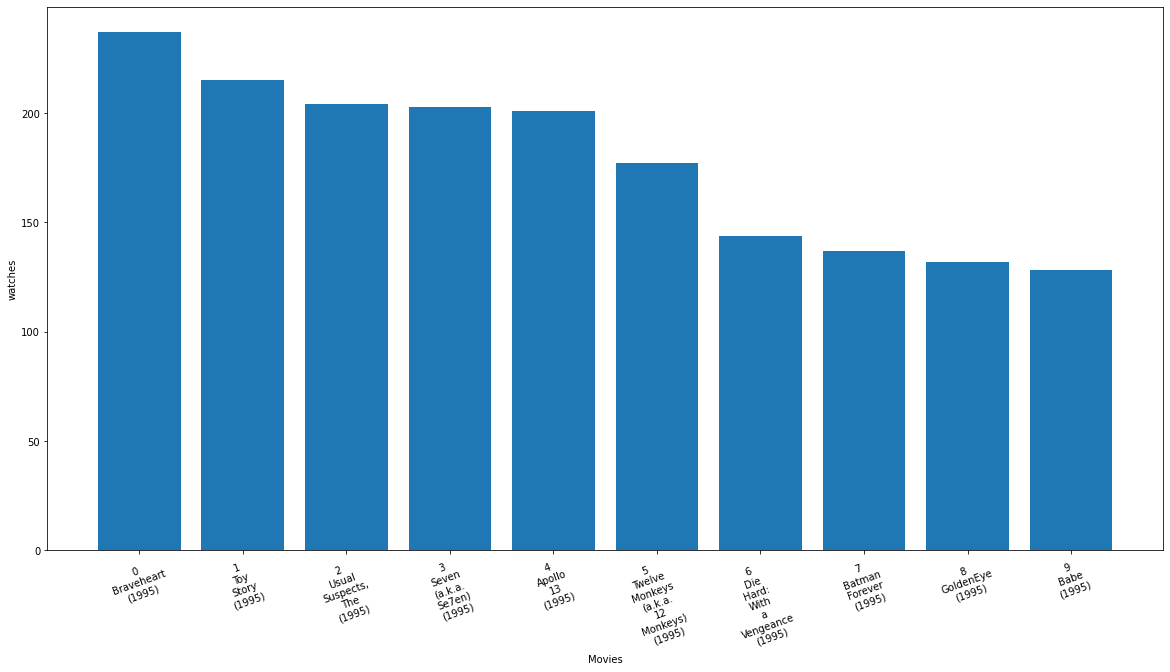

In [9]:
plotting.generic_plot(search.filter_year("1995", 10,"watches"), 'watches')

Plot the most watched movies in a given decade

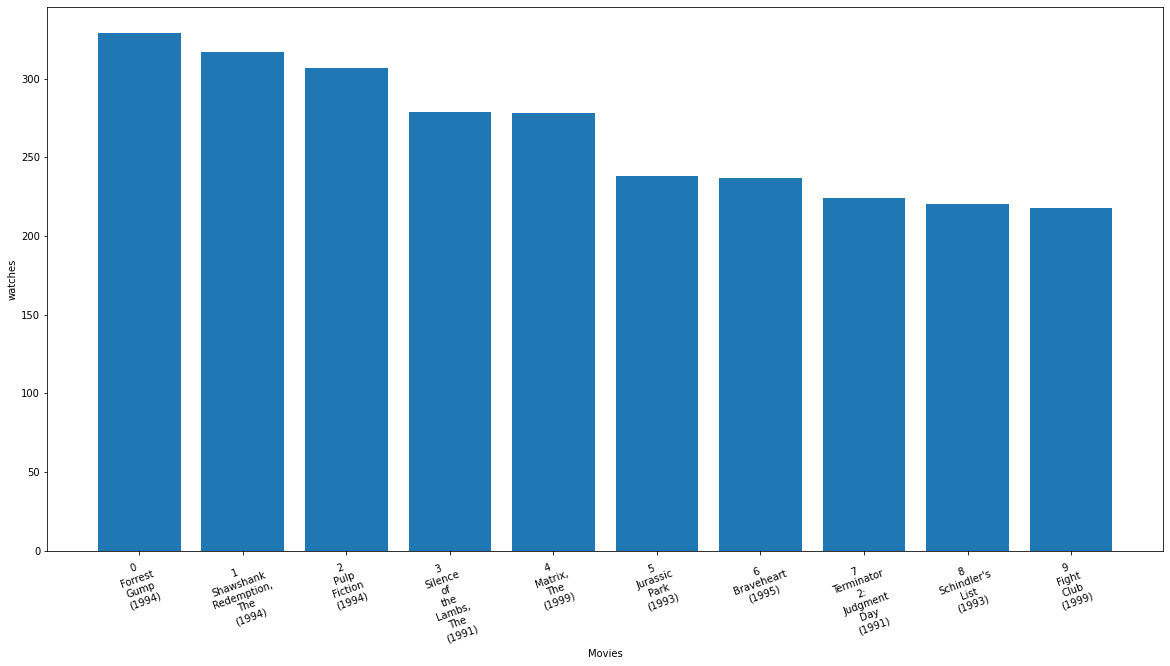

In [8]:
plotting.generic_plot(search.filter_decade("199", 10,"watches"), 'watches')

Plot the most watched movies of each decade

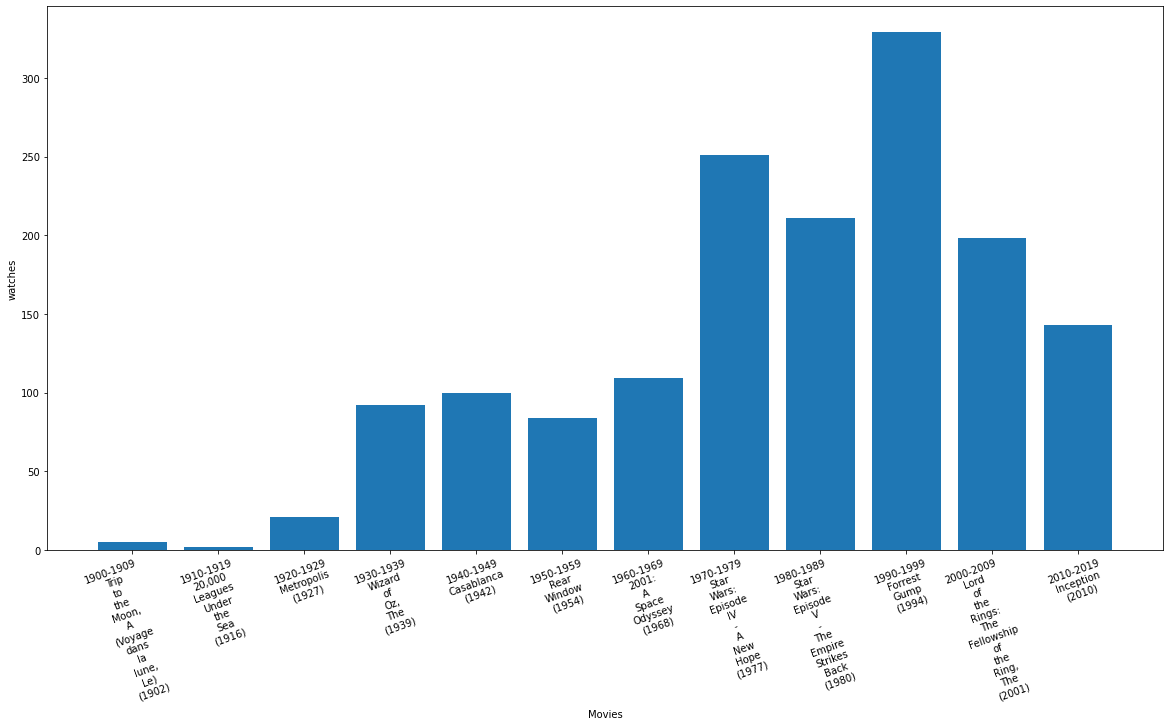

In [10]:
plotting.generic_plot(search.top_each_decade('watches'), 'watches')

Plot the most watched movies of all time

In [11]:
plotting.plot_generic_plotwatches(search.list_watches(10), 'watches')

AttributeError: 'Plotting' object has no attribute 'plot_generic_plotwatches'

Plot the highest rated movies in a given year

In [ ]:
plotting.generic_plot(search.filter_year("1995", 10,"avg(rating)"),avg(rating))

Plot the highest rated movies in a given decade

In [ ]:
plotting.generic_plot(search.filter_decade("199", 10,"avg(rating)"),avg(rating))

Plot the highest rated movies of each decade

In [ ]:
plotting.generic_plot(search.top_each_decade('avg(rating)'),avg(rating))

Plot the highest rated movies of all time

In [ ]:
plotting.generic_plot(search.list_rating(10))

In [ ]:
plotting.gen_movie_wordcloud("Pulp Fiction")

Recommend movies for a set of users

In [ ]:
search.recommend_n_movies_for_users(5, ["1", "3", "47", "235"]).show(truncate=False)

In [ ]:
search.recommend_n_movies_for_users(5, ["1"]).show(truncate=False)


In [6]:
search.cluster("477", 2)

609


TypeError: '<' not supported between instances of 'NoneType' and 'float'